Let's play with segmenting text in words

In [1]:
import wordsegment

In [2]:
help(wordsegment)

Help on package wordsegment:

NAME
    wordsegment - English Word Segmentation in Python

DESCRIPTION
    Word segmentation is the process of dividing a phrase without spaces back
    into its constituent parts. For example, consider a phrase like "thisisatest".
    For humans, it's relatively easy to parse. This module makes it easy for
    machines too. Use `segment` to parse a phrase into its parts:
    
    >>> from wordsegment import load, segment
    >>> load()
    >>> segment('thisisatest')
    ['this', 'is', 'a', 'test']
    
    In the code, 1024908267229 is the total number of words in the corpus. A
    subset of this corpus is found in unigrams.txt and bigrams.txt which
    should accompany this file. A copy of these files may be found at
    http://norvig.com/ngrams/ under the names count_1w.txt and count_2w.txt
    respectively.
    
    Copyright (c) 2016 by Grant Jenks
    
    Based on code from the chapter "Natural Language Corpus Data"
    from the book "Beautiful Dat

In [3]:
from wordsegment import load, segment
load()

Let's create a sting to play with

In [4]:
example_string = "Article summary of state of the art, and challenges for natural language processing."
example = example_string.replace(" ", "")
print(example)

Articlesummaryofstateoftheart,andchallengesfornaturallanguageprocessing.


In [5]:
segment(example)

['article',
 'summary',
 'of',
 'state',
 'of',
 'the',
 'art',
 'and',
 'challenges',
 'for',
 'natural',
 'language',
 'processing']

let's see what we're getting

In [6]:
print(" ".join(segment(example)))

article summary of state of the art and challenges for natural language processing


what if we change something?

In [7]:
example_string = "Article summary of state of the art, and challenges for NLP and chatbot development."
example = example_string.replace(" ", "")
segment(example)

['article',
 'summary',
 'of',
 'state',
 'of',
 'the',
 'art',
 'and',
 'challenges',
 'for',
 'nlp',
 'and',
 'chatbot',
 'development']

(not bad)

Basic experimentation on NLTK and corpora
====

In [ ]:
import spacy


In [8]:
import nltk

In [9]:
from nltk import corpus

In [10]:
help(corpus)

Help on LazyModule in nltk.nltk object:

nltk.nltk.corpus = class LazyModule(builtins.object)
 |  Lazy module class.
 |  
 |  Lazy modules are imported into the given namespaces whenever a
 |  non-special attribute (there are some attributes like __doc__
 |  that class instances handle without calling __getattr__) is
 |  requested. The module is then registered under the given name
 |  in locals usually replacing the import wrapper instance. The
 |  import itself is done using globals as global namespace.
 |  
 |  Example of creating a lazy load module:
 |  
 |  ISO = LazyModule('ISO',locals(),globals())
 |  
 |  Later, requesting an attribute from ISO will load the module
 |  automatically into the locals() namespace, overriding the
 |  LazyModule instance:
 |  
 |  t = ISO.Week(1998,1,1)
 |  
 |  Methods defined here:
 |  
 |  __getattr__(self, name)
 |      Import the module on demand and get the attribute.
 |  
 |  __init__(self, name, locals, globals=None)
 |      Create a LazyMod

NLTK corpus readers.  The modules in this package provide functions
that can be used to read corpus files in a variety of formats.  These
functions can be used to read both the corpus files that are
distributed in the NLTK corpus package, and corpus files that are part
of external corpora.


Available Corpora
=================

Please see http://www.nltk.org/nltk_data/ for a complete list.
Install corpora using nltk.download().

In [11]:
# let's play
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

![image.png](attachment:image.png)

In [12]:
import nltk.book

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [13]:
nltk.book.text3.vocab()

FreqDist({'In': 12,
          'the': 2411,
          'beginning': 5,
          'God': 231,
          'created': 11,
          'heaven': 28,
          'and': 2428,
          'earth': 111,
          '.': 1315,
          'And': 1250,
          'was': 317,
          'without': 9,
          'form': 1,
          ',': 3681,
          'void': 1,
          ';': 605,
          'darkness': 4,
          'upon': 139,
          'face': 47,
          'of': 1358,
          'deep': 6,
          'Spirit': 2,
          'moved': 2,
          'waters': 32,
          'said': 476,
          'Let': 29,
          'there': 116,
          'be': 254,
          'light': 11,
          ':': 238,
          'saw': 57,
          'that': 509,
          'it': 290,
          'good': 44,
          'divided': 10,
          'from': 157,
          'called': 98,
          'Day': 1,
          'he': 648,
          'Night': 1,
          'evening': 10,
          'morning': 20,
          'were': 163,
          'first': 16,
        

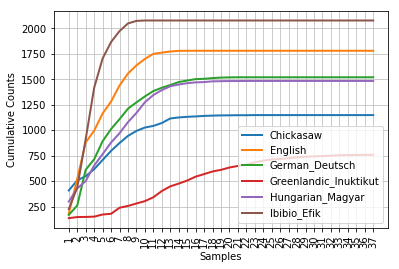

In [14]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

In [15]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [16]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
print([wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB'][:20])

['is', 'said', 'was', 'are', 'be', 'has', 'have', 'will', 'says', 'would', 'were', 'had', 'been', 'could', "'s", 'can', 'do', 'say', 'make', 'may']


In [17]:
from nltk.corpus import brown

def process(sentence):
    for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            return w1, w2, w3

counter = 0
for tagged_sent in brown.tagged_sents():
    res = process(tagged_sent)
    if res:
        print(" ".join(res))
        counter += 1
    if counter > 20:
        break

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
raised to pay


TOKENIZATION
===

In [5]:
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, treebank, punkt

In [26]:
import spacy
nlp = spacy.load('en')

In [31]:
example_tok = "Hello Mr. Smith, how are you doing today? The weather is great, and Python is awesome. The sky is pinkish-blue. You shouldn't eat cardboard."
print(example_tok)

Hello Mr. Smith, how are you doing today? The weather is great, and Python is awesome. The sky is pinkish-blue. You shouldn't eat cardboard.


In [7]:
sent_tokenize(example_tok)

['Hello Mr. Smith, how are you doing today?',
 'The weather is great, and Python is awesome.',
 'The sky is pinkish-blue.',
 "You shouldn't eat cardboard."]

In [8]:
print(word_tokenize(example_tok))

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'Python', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard', '.']


In [16]:
print(example_tok.split(" "))

['Hello', 'Mr.', 'Smith,', 'how', 'are', 'you', 'doing', 'today?', 'The', 'weather', 'is', 'great,', 'and', 'Python', 'is', 'awesome.', 'The', 'sky', 'is', 'pinkish-blue.', 'You', "shouldn't", 'eat', 'cardboard.']


In [19]:
import re
punkt = re.compile("\s")

In [21]:
print(punkt.split(example_tok))

['Hello', 'Mr.', 'Smith,', 'how', 'are', 'you', 'doing', 'today?', 'The', 'weather', 'is', 'great,', 'and', 'Python', 'is', 'awesome.', 'The', 'sky', 'is', 'pinkish-blue.', 'You', "shouldn't", 'eat', 'cardboard.']


In [25]:
print([str(el) for el in nlp(example_tok)])

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'Python', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish', '-', 'blue', '.', 'You', 'should', "n't", 'eat', 'cardboard', '.']


In [27]:
len(nlp(example_tok))

33

In [28]:
len(word_tokenize(example_tok))

31

In [30]:
len(punkt.split(example_tok))

24

In [22]:
tokenizers = [word_tokenize, sent_tokenize, treebank.TreebankWordTokenizer().tokenize, ]
for t in tokenizers:
    print(t(example_tok))

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'Python', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard', '.']
['Hello Mr. Smith, how are you doing today?', 'The weather is great, and Python is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard."]
['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'Python', 'is', 'awesome.', 'The', 'sky', 'is', 'pinkish-blue.', 'You', 'should', "n't", 'eat', 'cardboard', '.']


In [23]:
german_text = u"Die Orgellandschaft Südniedersachsen umfasst das Gebiet der Landkreise Goslar, Göttingen, Hameln-Pyrmont, Hildesheim, Holzminden, Northeim und Osterode am Harz sowie die Stadt Salzgitter. Über 70 historische Orgeln vom 17. bis 19. Jahrhundert sind in der südniedersächsischen Orgellandschaft vollständig oder in Teilen erhalten. "
sent_tokenize(german_text)

['Die Orgellandschaft Südniedersachsen umfasst das Gebiet der Landkreise Goslar, Göttingen, Hameln-Pyrmont, Hildesheim, Holzminden, Northeim und Osterode am Harz sowie die Stadt Salzgitter.',
 'Über 70 historische Orgeln vom 17. bis 19.',
 'Jahrhundert sind in der südniedersächsischen Orgellandschaft vollständig oder in Teilen erhalten.']

In [24]:
sent_tokenize(german_text, language='German')

['Die Orgellandschaft Südniedersachsen umfasst das Gebiet der Landkreise Goslar, Göttingen, Hameln-Pyrmont, Hildesheim, Holzminden, Northeim und Osterode am Harz sowie die Stadt Salzgitter.',
 'Über 70 historische Orgeln vom 17. bis 19. Jahrhundert sind in der südniedersächsischen Orgellandschaft vollständig oder in Teilen erhalten.']

In [25]:
bullet_sent = '• I am a sentence • I am another sentence • I am a sentence • I am another sentence'
sent_tokenize(bullet_sent)

['• I am a sentence • I am another sentence • I am a sentence • I am another sentence']

In [26]:
from nltk.corpus import gutenberg
 
print(gutenberg.fileids())
 
text = ""
for file_id in gutenberg.fileids():
    text += gutenberg.raw(file_id)
 
len(text) 

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


11793318

In [27]:
from pprint import pprint
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktTrainer
 
trainer = PunktTrainer()
trainer.INCLUDE_ALL_COLLOCS = True
trainer.train(text)
 
tokenizer = PunktSentenceTokenizer(trainer.get_params())
 

In [28]:
# Test the tokenizer on a piece of text
sentences = "Mr. James told me Dr. Brown is not available today. I will try tomorrow."
 
print(tokenizer.tokenize(sentences))
# ['Mr. James told me Dr.', 'Brown is not available today.', 'I will try tomorrow.']
 
# View the learned abbreviations
print(tokenizer._params.abbrev_types)
# set([...])
 

['Mr. James told me Dr.', 'Brown is not available today.', 'I will try tomorrow.']
{'ang', 'b', 'rosin', 'bru', 'p.m', 'moo', 'rev', 'oct', 'c', 'hec', '1.ple', 'pol', 'ophe', 'ros', 'boa', 'y.sey', 'jun', 'ser', 'w', 'finsb', 'n', 'malc', 'm', 'mes', 'ro', 'cin', 'cai', 'g', 'macb', 'stra', 'k', 'octa', 'gho', 'ibid', 'calp', 'mss', 'ely', 'fred', 'dut', 'mal', 'hon', 'p', 'k.c', 'sw', 'ed', 'o.r', 'hag', 'lbs', 'esq', 'u', 'cop', 'a.d', 'm.d', 'ami', 'var', 'laer', 'ple', 'messa', 'cly', 'cic', 'ult', 'u.s', 'sey', 'talb', 'deci', 'fran', 'l10', 'v.e', 'osr', 'm.p', 'macd', 'etc', 'polon', 'banq', 'tit', 'cyn', 'gent', 'j', 'cassi', 'ger', 'fla', 'pind', 'doct', 'ave', 'cath', 'p.s', 'xxx', 'clo', 'g.k', 'a.s', 'vol', 'brut', 'xx', 'luc', 'ant', 'mt', 's.w.f', 'qu', 'treb', 'i.e', 'f', 'guil', 'bap', 'dag', 'mac', 'amb', "'w", 'burs', 'vat', 'foh', 'hora', 'dard', 'trans', 'syw', 'clit', 'len', 'ment', "'mr", 'cass', 'cob', 'p.h', 'mur', 'por', 'cas', "'dr", 'prima', 'n.e', 'poe', 'g

In [29]:
tokenizer.tokenize(bullet_sent)

['• I am a sentence • I am another sentence • I am a sentence • I am another sentence']

In [30]:
punctuation = (';', ':', ',', '.', '!', '?', '•')

In [31]:
bullet_sent.split('• ')

['',
 'I am a sentence ',
 'I am another sentence ',
 'I am a sentence ',
 'I am another sentence']

In [32]:
[s for s in bullet_sent.split('• ') if s]

['I am a sentence ',
 'I am another sentence ',
 'I am a sentence ',
 'I am another sentence']

In [33]:
sentence = "My friend holds a Msc. in Computer Science."
sent_tokenize(sentence)

['My friend holds a Msc.', 'in Computer Science.']

In [34]:
tokenizer.tokenize(sentence)

['My friend holds a Msc.', 'in Computer Science.']

In [35]:
tokenizer._params.abbrev_types.add('msc')
tokenizer.tokenize(sentence)

['My friend holds a Msc. in Computer Science.']

More fun

In [1]:
import spacy
nlp = spacy.load('en')

In [2]:
ambiguous = "I made her duck"
amb_doc1 = nlp(ambiguous)
for word in amb_doc1:
    print(word.text, word.lemma, word.lemma_, word.tag, word.tag_, word.pos, word.pos_)

I 561228191312463089 -PRON- 13656873538139661788 PRP 94 PRON
made 9614445426764226664 make 17109001835818727656 VBD 99 VERB
her 561228191312463089 -PRON- 4062917326063685704 PRP$ 83 ADJ
duck 17978585585790962591 duck 15308085513773655218 NN 91 NOUN


In [18]:
for el in nlp(example_tok):
    print(el, el.pos_)

Hello INTJ
Mr. PROPN
Smith PROPN
, PUNCT
how ADV
are VERB
you PRON
doing VERB
today NOUN
? PUNCT
The DET
weather NOUN
is VERB
great ADJ
, PUNCT
and CCONJ
Python PROPN
is VERB
awesome ADJ
. PUNCT
The DET
sky NOUN
is VERB
pinkish ADJ
- PUNCT
blue NOUN
. PUNCT
You PRON
should VERB
n't ADV
eat VERB
cardboard NOUN
. PUNCT


In [38]:
nltk.pos_tag(nltk.word_tokenize(ambiguous))

[('I', 'PRP'), ('made', 'VBD'), ('her', 'PRP'), ('duck', 'NN')]

In [39]:
text_brown = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text_brown.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


In [40]:
import textacy
from textacy import doc
import pandas as pd

In [41]:
my_doc = doc.Doc(bullet_sent)
my_doc

Doc(20 tokens; "• I am a sentence • I am another sentence • I a...")

In [42]:
my_doc.pos_tagged_text

[[('•', 'PUNCT'),
  ('I', 'PRON'),
  ('am', 'VERB'),
  ('a', 'DET'),
  ('sentence', 'NOUN'),
  ('•', 'PUNCT'),
  ('I', 'PRON'),
  ('am', 'VERB'),
  ('another', 'DET'),
  ('sentence', 'NOUN'),
  ('•', 'PUNCT'),
  ('I', 'PRON'),
  ('am', 'VERB'),
  ('a', 'DET'),
  ('sentence', 'NOUN'),
  ('•', 'PUNCT')],
 [('I', 'PRON'), ('am', 'VERB'), ('another', 'DET'), ('sentence', 'NOUN')]]

In [43]:
list(my_doc.sents)

[• I am a sentence • I am another sentence • I am a sentence •,
 I am another sentence]

In [44]:
sent = sentence = "My friend holds a Msc. in Computer Science, so he is not a Dr. in that at all..."
s_doc = doc.Doc(sent)
list(s_doc.sents)

[My friend holds a Msc. in Computer Science, so he is not a Dr. in that at all...]

In [45]:
s_doc.pos_tagged_text

[[('My', 'ADJ'),
  ('friend', 'NOUN'),
  ('holds', 'VERB'),
  ('a', 'DET'),
  ('Msc', 'PROPN'),
  ('.', 'PUNCT'),
  ('in', 'ADP'),
  ('Computer', 'PROPN'),
  ('Science', 'PROPN'),
  (',', 'PUNCT'),
  ('so', 'ADP'),
  ('he', 'PRON'),
  ('is', 'VERB'),
  ('not', 'ADV'),
  ('a', 'DET'),
  ('Dr.', 'PROPN'),
  ('in', 'ADP'),
  ('that', 'DET'),
  ('at', 'ADP'),
  ('all', 'ADV'),
  ('...', 'PUNCT')]]

In [46]:
ambiguous = "I made her duck"
amb_doc1 = nlp(ambiguous)
for word in amb_doc1:
    print(word.text, word.lemma, word.lemma_, word.tag, word.tag_, word.pos, word.pos_)

I 757862 -PRON- 479 PRP 93 PRON
made 664 make 489 VBD 98 VERB
her 757862 -PRON- 480 PRP$ 82 ADJ
duck 7797 duck 474 NN 90 NOUN


In [47]:
amb_doc2 = doc.Doc(ambiguous)
amb_doc2.pos_tagged_text

[[('I', 'PRON'), ('made', 'VERB'), ('her', 'ADJ'), ('duck', 'NOUN')]]

In [35]:
review = '''The Road-550-W from Adventure Works Cycles is everything it's advertised to be. Finally, a quality bike that is actually built for a woman and provides control and comfort in one neat package. The top tube is shorter, the suspension is weight-tuned and there's a much shorter reach to the brake levers. All this adds up to a great mountain bike that is sure to accommodate any woman's anatomy. In addition to getting the size right, the saddle is incredibly comfortable. Attention to detail is apparent in every aspect from the frame finish to the careful design of each component. Each component is a solid performer without any fluff. The designers clearly did their homework and thought about size, weight, and funtionality throughout. And at less than 19 pounds, the bike is manageable for even the most petite cyclist. We had 5 riders, including my good friend Dr. Joseph A. Bicycle, and his wife, Mrs. Jane Bicycle, take the bike out for a spin and really put it to the test. The results were consistent and very positive. Our testers loved the manuverability and control they had with the redesigned frame on the 550-W. A definite improvement over the 2002 design. Four out of five testers listed quick handling and responsivness were the key elements they noticed. Technical climbing and on the flats, the bike just cruises through the rough. Tight corners and obstacles were handled effortlessly. The fifth tester was more impressed with the smooth ride. The heavy-duty shocks absorbed even the worst bumps and provided a soft ride on all but the nastiest trails and biggest drops. The shifting was rated superb and typical of what we've come to expect from Adventure Works Cycles. On descents, the bike handled flawlessly and tracked very well. The bike is well balanced front-to-rear and frame flex was minimal. In particular, the testers noted that the brake system had a unique combination of power and modulation.  While some brake setups can be overly touchy, these brakes had a good amount of power, but also a good feel that allows you to apply as little or as much braking power as is needed. Second is their short break-in period. We found that they tend to break-in well before the end of the first ride; while others take two to three rides (or more) to come to full power. On the negative side, the pedals were not quite up to our tester's standards. Just for fun, we experimented with routine maintenance tasks. Overall we found most operations to be straight forward and easy to complete. The only exception was replacing the front wheel. The maintenance manual that comes with the bike say to install the front wheel with the axle quick release or bolt, then compress the fork a few times before fastening and tightening the two quick-release mechanisms on the bottom of the dropouts. This is to seat the axle in the dropouts, and if you do not do this, the axle will become seated after you tightened the two bottom quick releases, which will then become loose. It's better to test the tightness carefully or you may notice that the two bottom quick releases have come loose enough to fall completely open. And that's something you don't want to experience while out on the road! The Road-550-W frame is available in a variety of sizes and colors and has the same durable, high-quality aluminum that AWC is known for. At a MSRP of just under $1125.00, it's comparable in price to its closest competitors and we think that after a test drive you'l find the quality and performance above and beyond . You'll have a grin on your face and be itching to get out on the road for more. While designed for serious road racing, the Road-550-W would be an excellent choice for just about any terrain and any level of experience. It's a huge step in the right direction for female cyclists and well worth your consideration and hard-earned money.'''

In [47]:
print(review)

The Road-550-W from Adventure Works Cycles is everything it's advertised to be. Finally, a quality bike that is actually built for a woman and provides control and comfort in one neat package. The top tube is shorter, the suspension is weight-tuned and there's a much shorter reach to the brake levers. All this adds up to a great mountain bike that is sure to accommodate any woman's anatomy. In addition to getting the size right, the saddle is incredibly comfortable. Attention to detail is apparent in every aspect from the frame finish to the careful design of each component. Each component is a solid performer without any fluff. The designers clearly did their homework and thought about size, weight, and funtionality throughout. And at less than 19 pounds, the bike is manageable for even the most petite cyclist. We had 5 riders, including my good friend Dr. Joseph A. Bicycle, and his wife, Mrs. Jane Bicycle, take the bike out for a spin and really put it to the test. The results were c

In [38]:
rev_t = doc.Doc(review)

In [37]:
from textacy import doc

In [46]:
for el in list(textacy.extract.named_entities(rev_t)):
    print(el, el.label_)

Adventure Works Cycles ORG
less than 19 pounds QUANTITY
5 CARDINAL
Joseph A. Bicycle PERSON
Jane Bicycle PERSON
2002 DATE
Four CARDINAL
five CARDINAL
fifth ORDINAL
Adventure Works Cycles ORG
Second ORDINAL
first ORDINAL
two CARDINAL
three CARDINAL
two CARDINAL
two CARDINAL
two CARDINAL
AWC ORG
just under $1125.00 MONEY


In [45]:
el.label_

'ORG'

In [33]:
import textacy

In [51]:
doc_s = nlp(review)

In [52]:
sentences = [sentence.orth_ for sentence in doc_s.sents]
print("There were {} sentences found. Here's a sample:".format(len(sentences)))
pd.DataFrame(sentences[8:13])

There were 37 sentences found. Here's a sample:


,0
0,"And at less than 19 pounds, the bike is manage..."
1,"We had 5 riders, including my good friend Dr. ..."
2,The results were consistent and very positive.
3,Our testers loved the manuverability and contr...
4,Four out of five testers listed quick handling...


In [53]:
nounphrases = [[np.orth_, np.root.head.orth_] for np in doc_s.noun_chunks]
print("There were {} noun phrases found. Here's a sample:".format(len(nounphrases)))
pd.DataFrame(nounphrases[8:18])

There were 156 noun phrases found. Here's a sample:


,0,1
0,one neat package,in
1,The top tube,is
2,the suspension,is
3,a much shorter reach,'s
4,the brake levers,to
5,a great mountain bike,to
6,any woman's anatomy,accommodate
7,addition,In
8,the size,getting
9,the saddle,is


In [55]:
from nltk import Tree


doc = nlp("The quick brown fox jumps over the lazy dog.")

def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_


[to_nltk_tree(sent.root).pretty_print() for sent in doc.sents]

                jumps                  
  ________________|____________         
 |    |     |     |    |      over     
 |    |     |     |    |       |        
 |    |     |     |    |      dog      
 |    |     |     |    |    ___|____    
The quick brown  fox   .  the      lazy



[None]

In [56]:
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent):
    print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


http://www.nltk.org/book/tree_images/ch08-tree-1.png
![image.png](attachment:image.png)

![image.png](attachment:image.png)

Entity recognition
===

In [65]:
entity = "Jim bought 300 shares of Acme Corp. in 2006."

In [58]:
from textacy import doc

In [59]:
entity_t = doc.Doc(entity)

In [60]:
entity_t.pos_tagged_text

[[('Jim', 'PROPN'),
  ('bought', 'VERB'),
  ('300', 'NUM'),
  ('shares', 'NOUN'),
  ('of', 'ADP'),
  ('Acme', 'PROPN'),
  ('Corp.', 'PROPN'),
  ('in', 'ADP'),
  ('2006', 'NUM'),
  ('.', 'PUNCT')]]

In [66]:
entities = list(textacy.extract.named_entities(entity_t))
entities

[Jim, 300, Acme Corp., 2006]

In [72]:
for e in entities:
    print(e, e.label_)
e = entities[2]
e.label_

Jim PERSON 
300 CARDINAL 
Acme Corp. ORG 
2006 DATE 


'ORG'

Stemming and Lemmatizers
===

In [1]:
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
snow = SnowballStemmer('english')

words = 'getting rabbits xyzing quickly slowly university universe'.split()
pos = 'v n n r r n n'.split()
all_words = zip(words, pos)

for w in all_words:
    try:
        print(w[0], snow.stem(w[0]), wnl.lemmatize(w[0], w[1]))
    except Exception as e:
        print(e)

getting get get
rabbits rabbit rabbit
xyzing xyze xyzing
quickly quick quickly
slowly slowli slowly
university univers university
universe univers universe


In [12]:
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
snow = SnowballStemmer('finnish')

words = 'getting rabbits xyzing quickly slowly university universe'.split()
all_words = zip(words, pos)

pos = 'v n v r r n n'.split()
for w in all_words:
    try:
        print(w[0], snow.stem(w[0]), wnl.lemmatize(w[0], w[1]))
    except Exception as e:
        print(e)

getting getting get
rabbits rabbits rabbit
xyzing xyzing xyzing
quickly quickly quickly
slowly slowly slowly
university university university
universe univers universe


In [5]:
import spacy
nlp = spacy.load('en')

In [9]:
xing = nlp('xyzing for fun an profit')
xing[0].lemma_, xing[0].pos_

('xyz', 'VERB')

In [ ]:
xx = 

In [85]:
for w in all_words:
    print(w[0])

getting
rabbits
xyzing
quickly
slowly


In [83]:
all_words = zip(words, pos)
list(all_words)

[('getting', 'v'),
 ('rabbits', 'n'),
 ('xyzing', 'n'),
 ('quickly', 'r'),
 ('slowly', 'r')]

In [95]:
print(nltk.corpus.stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [97]:
>>> import nltk
>>> def features(s):
...     vec = {}
...     for token in nltk.tokenize.word_tokenize(s):
...         vec[token] = 1 if token not in vec else vec[token] + 1
...
...     return vec
...
>>> data = [('Hi John, I will see you at 9:00pm', 'ham'),
...         ('Buy Viagra at low, low prices.  One time offer.', 'spam'),
...         ('Your Amazon Order is for the book "Harry Potter"', 'ham'),
...         ('Earn a million dollars by working at home.', 'spam')]
...
>>> processed_data = [(features(tup[0]), tup[1]) for tup in data]
>>> classifier = nltk.NaiveBayesClassifier.train(processed_data)
>>> print(classifier.classify(features("This is good Viagra!")))
>>> print(classifier.classify(features("We will meet you at 7pm.  Take care")))


spam
ham


In [1]:
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()
 
print(lemmatizer.lemmatize('playing', pos="v"))
print(lemmatizer.lemmatize('playing', pos="n"))
print(lemmatizer.lemmatize('playing', pos="a"))
print(lemmatizer.lemmatize('playing', pos="r"))

play
playing
playing
playing


In [4]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

print(stemmer.stem('stones'))
print(stemmer.stem('speaking'))
print(stemmer.stem('bedroom'))
print(stemmer.stem('jokes'))
print(stemmer.stem('lisa'))
print(stemmer.stem('purple'))
print('----------------------')
print(lemmatizer.lemmatize('stones'))
print(lemmatizer.lemmatize('speaking'), lemmatizer.lemmatize('speaking', pos='v'))
print(lemmatizer.lemmatize('bedroom'))
print(lemmatizer.lemmatize('jokes'))
print(lemmatizer.lemmatize('lisa'))
print(lemmatizer.lemmatize('purple'))

stone
speak
bedroom
joke
lisa
purpl
----------------------
stone
speaking speak
bedroom
joke
lisa
purple
